<span color = 'Blue'> To study the impact of various factors like BMI,BP etc, on diabetes,and using Machine Learning to predict whether or not a person has diabetes based on data about the patient such as blood pressure, BMI, age, and so on.</span>The data was collected and made accessible as part of the Pima Indians Diabetes Database by the "National Institute of Diabetes and Digestive and Kidney Diseases." The selection of these cases from a wider database was subjected to many limitations. All of the patients here are girls aged 21 and over who are of Pima Indian ancestry (a subset of Native Americans).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression


In [54]:
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The following features have been provided to help us predict whether a person is diabetic or not:
Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)2)
DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
Age: Age (years)
Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [3]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


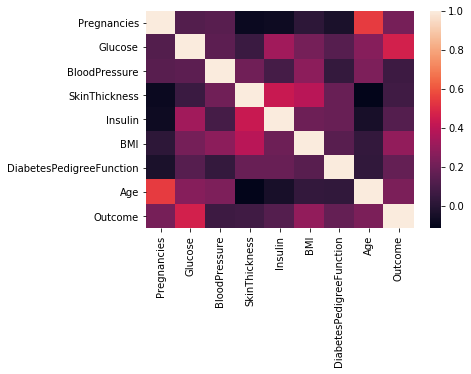

In [55]:
corr = diabetesDF.corr()
corr
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

Brighter colours in the heatmap above suggest higher correlation. Glucose levels, age, BMI, and the number of pregnancies all have strong correlations with the outcome variable, as shown in the table and heatmap. Take note of any associations between traits, such as age and pregnancies, or insulin and skin thickness.

In [30]:
#The relation between age and outcome

x = diabetesDF.Age[diabetesDF.Outcome == 1].count()
y = diabetesDF.Age[diabetesDF.Outcome == 0].count()
z = [x,y]
Outcomes = ['1','0']

<BarContainer object of 2 artists>

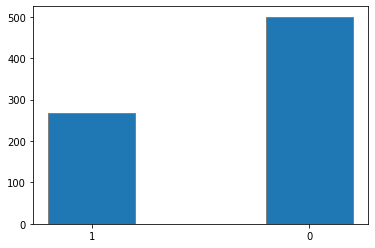

In [31]:
plt.bar(Outcomes,z,
        edgecolor ='grey',width = 0.4)

The data set consists of record of 767 patients in total. To train our model we will be using 650 records. We will be using 100 records for testing, and the last 17 records to cross check our mode

In [32]:
dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]


we separate the label and features (for both training and test dataset). In addition to that, we will also convert them into NumPy arrays as our machine learning algorithm process data in NumPy array format

In [33]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))#here 1 signifies that the whole column is deleted 
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

Further now we have to convert the given data into Normal distribution data with mean 0 and standard deviation 1so that Centarl limit thoerm used in hypothesis testing can easily been appilid over it 

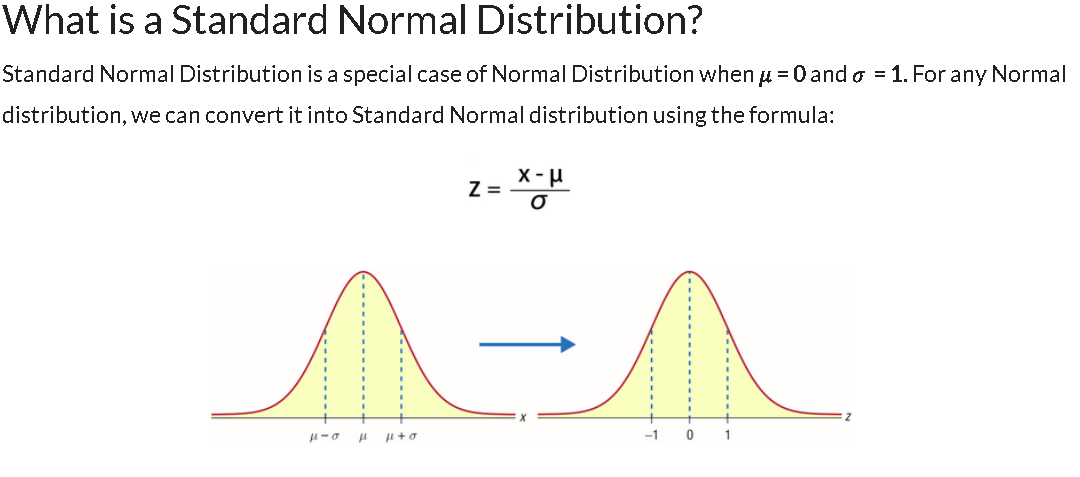

In [40]:
from IPython.display import Image
Image(filename="abc.png")

In [34]:
means = np.mean(trainData, axis=0)# here the process is done row by row 
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [36]:
#check whther the function is converted into standard noraml variable or not 
np.mean(trainData, axis=0)

np.std(trainData, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

Optimize our classification algorithm We'll use logistic regression, a machine simple learning model. The training method is simple and can be done in a few lines of code because the model is easily available in sklearn. To train the model, we first construct an instance called diabetesCheck and then use the fit method.

In [41]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
accuracy = diabetesCheck.score(testData, testLabel)#testing out the accuracy of the model.
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


Interpretetion and Result 

Text(0.5, 0, 'Importance')

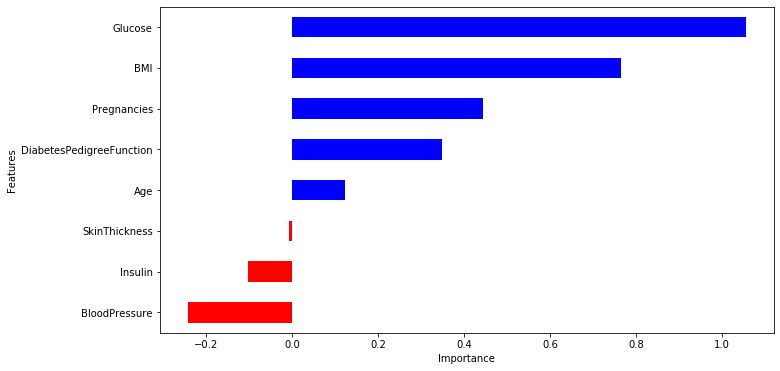

In [51]:
coeff = list(diabetesCheck.coef_[0])#A regression coefficient describes the size and direction of the relationship between a predictor and the response variable
labels = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

The following conclusions can be drawn from the preceding diagram.

The model is affected by glucose levels, BMI, pregnancies, and diabetes pedigree function, particularly glucose levels and BMI. It's encouraging to see our machine learning model corroborate what we've heard from doctors our entire lives

Blood pressure has a negative impact on the prediction, implying that higher blood pressure is associated with the absence of diabetes. (It's also worth noting that blood pressure is more essential as a feature than age because blood pressure has a larger magnitude).

Despite the fact that age was more closely related to the output variables than BMI (as we discovered during data exploration), the model favours BMI. This can occur for a variety of reasons, including the fact that the age-related association is also caught by another measure, whereas the information obtained by BMI is not.